# **1. Import Basic Library**

In [30]:
pip install matplotlib

In [31]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Import Dataset**

In [33]:
dataset= pd.read_csv('Dataset7_Airline_Satisfaction.csv')
dataset.head(20)

,Customer Type,Class,Gender,Age,Type of Travel,Flight Distance,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,Eco,Female,65,Personal Travel,265,5,0,0.0,satisfied
1,Loyal Customer,Business,Male,47,Personal Travel,2464,2,310,305.0,satisfied
2,Loyal Customer,Eco,Female,15,Personal Travel,2138,4,0,0.0,satisfied
3,Loyal Customer,Eco,Female,60,Personal Travel,623,4,0,0.0,satisfied
4,Loyal Customer,Eco,Female,70,Personal Travel,354,4,0,0.0,satisfied
5,Loyal Customer,Eco,Male,30,Personal Travel,1894,5,0,0.0,satisfied
6,Loyal Customer,Eco,Female,66,Personal Travel,227,5,17,15.0,satisfied
7,Loyal Customer,Eco,Male,10,Personal Travel,1812,5,0,0.0,satisfied
8,Loyal Customer,Business,Female,56,Personal Travel,73,5,0,0.0,satisfied
9,Loyal Customer,Eco,Male,22,Personal Travel,1556,3,30,26.0,satisfied


Attributes Description:


1. Customer Type: the category of customers based on their type (Loyal Customer or Disloyal Customer).
2. Class: the class of services used by the customers (Eco, Eco Plus, or Bussiness).
3. Gender: the gender of customers (Male or Female).
4. Age: the age of the customers.
5. Type of Travel: represent the purpose of the customer's travel (Bussiness travel or Personal travel).
6. Flight Distance: the distance of the flight in miles.
7. Checkin Service: represent the customer's satisfaction with the airline's check-in service (scale 1-5).
8. Departure Delay in Minutes: represents the duration of the departure delay in minutes for each flight.
9. Arrival Delay in Minutes: represent the duration of the arrival delay in minutes for each flight.
10. satisfaction: represents the customer's satisfaction level with their overall flight experience (satisfied or dissatisfied).



In [34]:
dataset = dataset.rename(columns=lambda x: x.replace(' ', '_').lower())

In [35]:
dataset = dataset.rename(columns={'class': 'customer_class'})

# **3. Data Preprocessing**

In [36]:
#Get information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_type               129880 non-null  object 
 1   customer_class              129880 non-null  object 
 2   gender                      129880 non-null  object 
 3   age                         129880 non-null  int64  
 4   type_of_travel              129880 non-null  object 
 5   flight_distance             129880 non-null  int64  
 6   checkin_service             129880 non-null  int64  
 7   departure_delay_in_minutes  129880 non-null  int64  
 8   arrival_delay_in_minutes    129487 non-null  float64
 9   satisfaction                129880 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 9.9+ MB


Findings:


1. Terdiri 129880 baris dan 10 kolom
2. Tipe data setiap kolom sudah sesuai
3. Terdapat missing value pada kolom Arrival Delay in Minutes



In [37]:
#Check missing value
print (dataset.isnull().sum())

customer_type                   0
customer_class                  0
gender                          0
age                             0
type_of_travel                  0
flight_distance                 0
checkin_service                 0
departure_delay_in_minutes      0
arrival_delay_in_minutes      393
satisfaction                    0
dtype: int64


Findings:
<br>Terdapat 393 baris atau data yang kosong pada kolom Arrival Delay in Minutes.</br>

Solutions:
<br>Biasanya ada korelasi yang kuat antara keterlambatan keberangkatan (Departure Delay) dan keterlambatan kedatangan (Arrival Delay). Jika penerbangan mengalami keterlambatan saat keberangkatan, kemungkinan besar akan ada keterlambatan saat kedatangan juga. Keduanya memiliki ketergantungan akan waktu, oleh karena itu, menggunkaan nilai Departure Delay in Minutes untuk mengisi missing values pada kolom Arrival Delay in Minutes dapat memberikan perkiraan yang masuk akal.
</br>

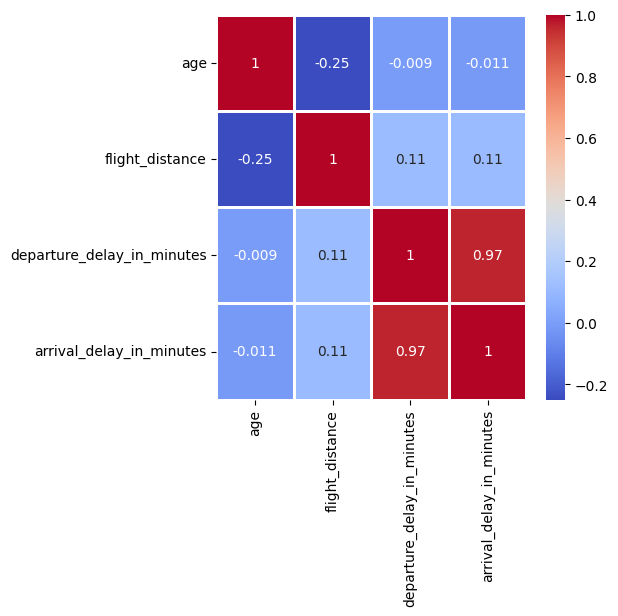

In [38]:
#Get the correlation matrix to see the correlation of each features, espacially Departure Delay in Minutes and Arrival Delay in Minutes.
corrmat = dataset[['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']].corr()
plt.figure(figsize=(5,5))
ax = sns.heatmap(corrmat, cmap = "coolwarm", annot=True, linewidth=2)

Findings:
<br>Departure Delay in Minutes dan Arrival Delay in Minutes terbukti memiliki korelasi positive yang kuat, yaitu sebesar 0.97 dan menjadi satu-satunya pasangan yang memiliki korelasi yang tinggi. Jadi dapat diputuskan mengisi missing value pada kolom Arrival Delay in Minutes menggunakan nilai dari Departure Delay in Minutes.</br>

In [39]:
# Fill the missing values of Arrival Delay in Minutes with the values of Departure Delay in Minutes.
dataset['arrival_delay_in_minutes'].fillna(dataset['departure_delay_in_minutes'], inplace = True)
# Check missing values
print (dataset.isnull().sum())

customer_type                 0
customer_class                0
gender                        0
age                           0
type_of_travel                0
flight_distance               0
checkin_service               0
departure_delay_in_minutes    0
arrival_delay_in_minutes      0
satisfaction                  0
dtype: int64


# **4. Exploratory Data Analysis**

In [40]:
# Calculate descriptive statistics for the numerical columns
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
flight_distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
checkin_service,129880.0,3.340807,1.260582,0.0,3.0,3.0,4.0,5.0
departure_delay_in_minutes,129880.0,14.713713,38.071126,0.0,0.0,0.0,12.0,1592.0
arrival_delay_in_minutes,129880.0,15.160102,38.599601,0.0,0.0,0.0,13.0,1584.0


In [41]:
# Calculate the descriptive statistic of categorical columns
dataset.select_dtypes('object').describe().T

,count,unique,top,freq
customer_type,129880,2,Loyal Customer,106100
customer_class,129880,3,Business,62160
gender,129880,2,Female,65899
type_of_travel,129880,2,Business travel,89693
satisfaction,129880,2,satisfied,71087


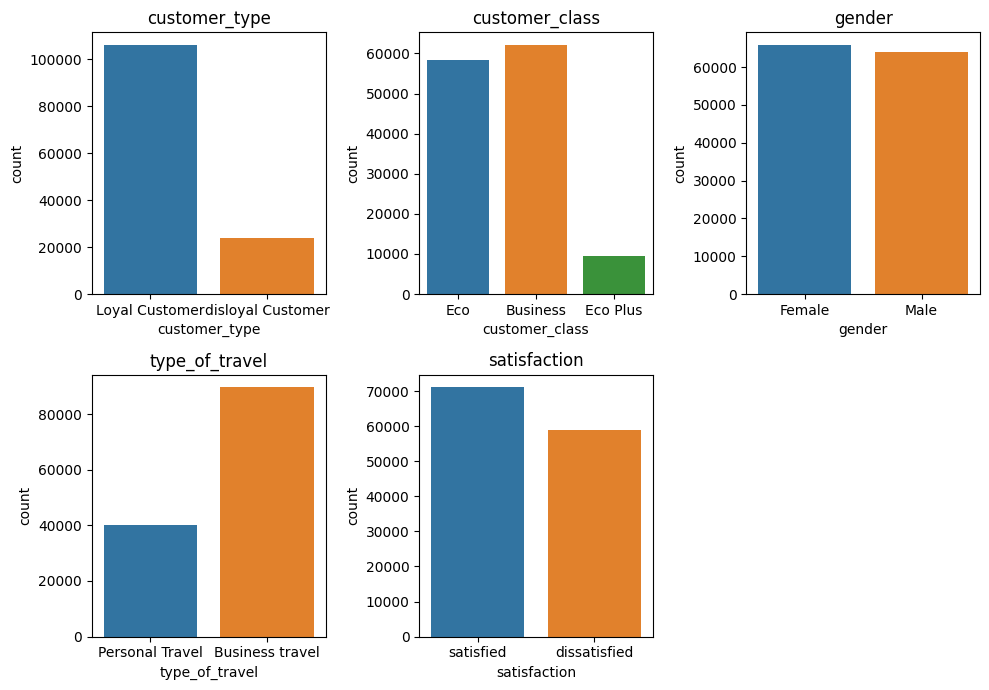

In [42]:
#Visualize the Categorical Variables
# Define the categorical columns to visualize
columns_to_visualize = ['customer_type', 'customer_class', 'gender', 'type_of_travel', 'satisfaction']

# Set the subplots size
plt.figure(figsize=(10, 7))

# Set the layout
layout = (2, 3)

# Loop through the columns to create pie charts
for i, column in enumerate(columns_to_visualize):
    plt.subplot(layout[0], layout[1], i+1)
    sns.countplot(x=column, data=dataset, palette='tab10')
    plt.title(column)

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

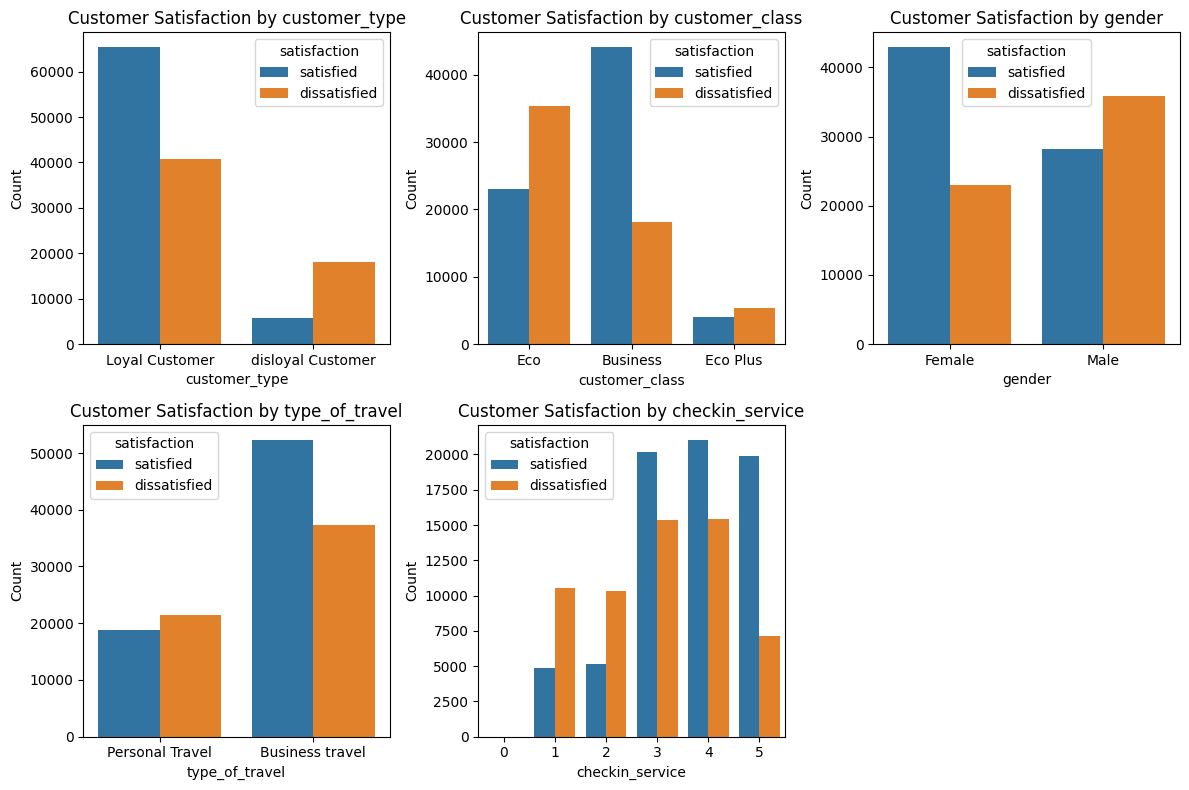

In [43]:
#Compare customer satisfaction across different categories
categorical_columns = ['customer_type', 'customer_class', 'gender', 'type_of_travel', 'checkin_service']

# Set the subplots size
plt.figure(figsize=(12, 8))

# Set the layout
layout = (2, 3)

# Loop through the categorical columns
for i, column in enumerate(categorical_columns):
    plt.subplot(layout[0], layout[1], i+1)
    sns.countplot(x=column, hue='satisfaction', data=dataset, palette='tab10')

    # Set labels and title
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Customer Satisfaction by ' + column)

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

Findings:


1. Terdapat perbedaan yang jelas dalam tingkat kepuasan antar jenis kelamin, dimana laki-laki cenderung memiliki proporsi ketidakpuasan yang lebih tinggi, sedangkan perempuan menunjukkan proporsi kepuasan yang lebih tinggi. Hal ini menunjukkan bahwa jenis kelamin dapat berperan dalam mempengaruhi kepuasan penumpang.
2. Terdapat perbedaan yang jelas dalam tingkat kepuasan antara pelanggan setia dan tidak setia, dimana pelanggan yang setia umumnya menunjukkan kepuasan yang lebih tinggi, sedangkan pelanggan yang tidak setia lebih rentan terhadap ketidakpuasan. Hasil ini menunjukkan pengaruh dari loyalitas pelanggan terhadap kepuasan secara keseluruhan, dimana pelanggan yang setia cenderung memiliki persepsi yang lebih positif dari pengalaman mereka dibandingkan dengan pelanggan yang tidak setia.
3. Pelanggan yang memesan kelas Bisnis lebih cenderung melaporkan tingkat kepuasan yang lebih tinggi dibandingkan dengan pelanggan yang memesan kelas Ekonomi atau Ekonomi Plus. Selain itu, terjadi penurunan tingkat kepuasan secara bertahap dari kelas Bisnis ke Ekonomi Plus dan kemudian ke kelas Ekonomi. Hal ini menunjukkan bahwa tingkat kepuasan dipengaruhi oleh kelas layanan yang dipilih, dengan layanan kelas yang lebih tinggi biasanya diasosiasikan dengan tingkat kepuasan yang lebih tinggi.
4. Pada bussiness travel, pelanggan yang puas lebih tinggi dibandingkan pelanggan yang tidak puas. Berbeda dengan dengan personal travel, pelanggan yang tidak puas lebih tinggi dibandingkan pelanggan yang puas.
5. Pelanggan yang memberikan rating checkin service dengan nilai 3-5 cenderung memiliki proporsi tingkat kepuasan yang lebih tinggi dibandingkan pelanggan yang memberikan raring kurang dari 3. Hal ini menunjunjukkan adanya kemungkinan pengaruh rating terhadap kepuasan pelanggan, dimana semakin tinggi rating checkin service maka semakin tinggi tingkat kepusasan pelanggan.



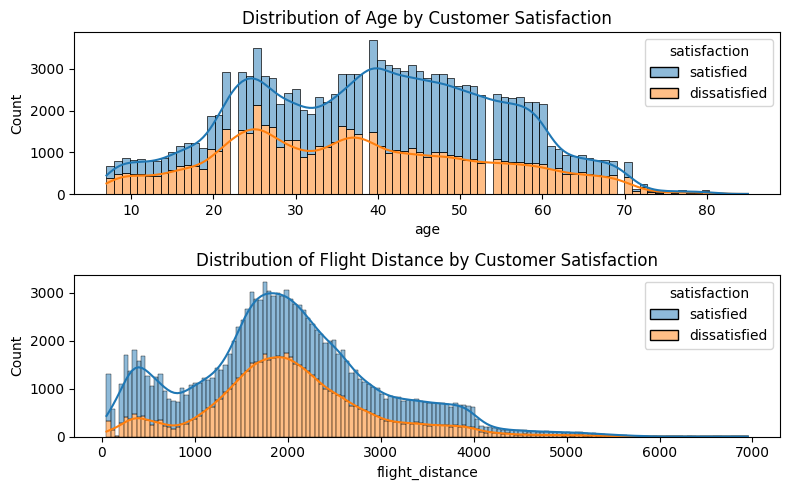

In [44]:
# Compare the age and flight distance distribution accros customer satisfaction
# Set the subplots size
plt.figure(figsize=(8, 5))

# Set the layout
layout = (2, 1)

# Plot Distribution of Age
plt.subplot(layout[0], layout[1], 1)
sns.histplot(data=dataset, x='age', hue='satisfaction', multiple='stack', kde=True, palette='tab10')
plt.title('Distribution of Age by Customer Satisfaction')
# Plot Distribution of Flight Distance
plt.subplot(layout[0], layout[1], 2)
sns.histplot(data=dataset, x='flight_distance', hue='satisfaction', multiple='stack', kde=True, palette='tab10')
plt.title('Distribution of Flight Distance by Customer Satisfaction')
# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

Findings:

1. Pelanggan yang lebih tua (sekitar 40 th ke atas) memiliki proporsi tingkat kepuasan dengan kategori yang puas lebih tinggi daripada tidak puas. Sedangkan pelanggan yang lebih muda (< 40 th) cenderung lebih banyak yang tidak puas daripada yang puas. Hal ini menunjukkan potensi pengaruh usia pada tingkat kepuasan, dengan pelanggan yang lebih tua cenderung menunjukkan tingkat kepuasan yang lebih tinggi.
2. Penerbangan dengan jarak dekat (< 1200 km) dan jarak jauh (> 3000 km)cenderung memiliki proporsi pelanggan yang puas lebih tinggi daripada pelanggan tidak puas. Sedangkan penerbangan dengan jarak menengah  (1200 - 3000 km) lebih banyak pelanggan yang tidak puas daripada pelanggan yang puas.



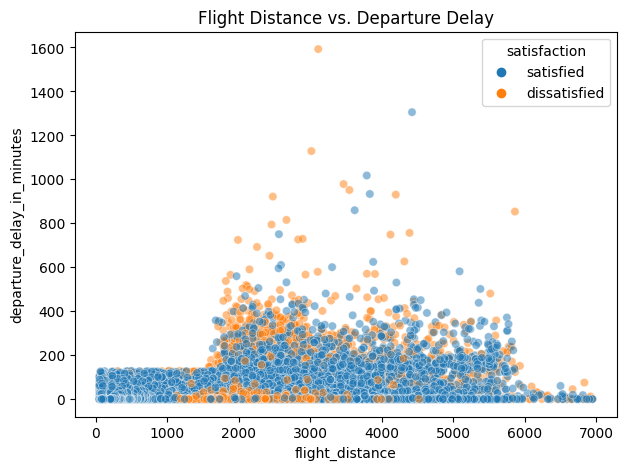

In [45]:
#Compare Flight Distance vs Departure Delay by Customer Satisfaction using scatter plot
plt.figure(figsize=(7, 5))

# Create a scatter plot of Flight Distance vs. Departure Delay in Minutes, segmented by satisfaction
sns.scatterplot(data=dataset, x='flight_distance', y='departure_delay_in_minutes', hue='satisfaction', alpha=0.5)

# Set the title of the plot
plt.title('Flight Distance vs. Departure Delay')

# Display the plot
plt.show()

Findings:
<br>Penerbangan jarak dekat cenderung memiliki durasi keterlambatan keberangkatan lebih singkat/minimal dibandingkan dengan yang lainnya. Hal ini mendukung pernyataan diatas, dimana pelanggan yang puas lebih banyak pada penerbangan jarak dekat tersebut karena durasi keterlambatan keberangkatan lebih singkat.</br>

<br>Hal ini sekaligus menunjukkan adanya potensi pengaruh dari keterlambatan keberangkatan terhadap tingkat kepuasan pelanggan.</br>

# **5. Label Encoding**

In [46]:
from sklearn.preprocessing import LabelEncoder

# Create label encoder
label_encoder = LabelEncoder()

# Iterate label encoding to the categorical columns
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        encoded_data = label_encoder.fit_transform(dataset[column])
        dataset[column] = encoded_data

In [47]:
dataset

,customer_type,customer_class,gender,age,type_of_travel,flight_distance,checkin_service,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,1,0,65,1,265,5,0,0.0,1
1,0,0,1,47,1,2464,2,310,305.0,1
2,0,1,0,15,1,2138,4,0,0.0,1
3,0,1,0,60,1,623,4,0,0.0,1
4,0,1,0,70,1,354,4,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
129875,1,1,0,29,1,1731,4,0,0.0,1
129876,1,0,1,63,1,2087,1,174,172.0,0
129877,1,1,1,69,1,2320,2,155,163.0,0
129878,1,1,1,66,1,2450,2,193,205.0,0


# **6. Drop Arrival Delay in Minutes Column**

<br>Kolom Departure Delay in Minutes dan Arrival Delay in Minutes memiliki korelasi positif yang sangat kuat dan keduanya memberikan informasi yang sangat mirip. Apabila mempertahankan keduanya dalam analisis atau pemodelan dapat menyebabkan masalah multi-kolinearitas. Hal ini dapat mempengaruhi performa model dan mengurangi interpretasi yang tepat tentang kontribusi variabel dalam pemodelan. Oleh karena itu, perlu menghapus kolom Arrival Delay in Minutes. </br>

In [48]:
dataset.drop('arrival_delay_in_minutes', axis=1, inplace=True)
dataset

,customer_type,customer_class,gender,age,type_of_travel,flight_distance,checkin_service,departure_delay_in_minutes,satisfaction
0,0,1,0,65,1,265,5,0,1
1,0,0,1,47,1,2464,2,310,1
2,0,1,0,15,1,2138,4,0,1
3,0,1,0,60,1,623,4,0,1
4,0,1,0,70,1,354,4,0,1
...,...,...,...,...,...,...,...,...,...
129875,1,1,0,29,1,1731,4,0,1
129876,1,0,1,63,1,2087,1,174,0
129877,1,1,1,69,1,2320,2,155,0
129878,1,1,1,66,1,2450,2,193,0


# **7. Splitting Dataset into Dependent and Independent**


In [49]:
X = dataset.drop('satisfaction', axis=1) # Independent
y = dataset['satisfaction'] # Dependent

In [50]:
X

,customer_type,customer_class,gender,age,type_of_travel,flight_distance,checkin_service,departure_delay_in_minutes
0,0,1,0,65,1,265,5,0
1,0,0,1,47,1,2464,2,310
2,0,1,0,15,1,2138,4,0
3,0,1,0,60,1,623,4,0
4,0,1,0,70,1,354,4,0
...,...,...,...,...,...,...,...,...
129875,1,1,0,29,1,1731,4,0
129876,1,0,1,63,1,2087,1,174
129877,1,1,1,69,1,2320,2,155
129878,1,1,1,66,1,2450,2,193


# **8. Scaling**

In [51]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Apply RobustScaler to the numeric columns
X_scaled = scaler.fit_transform(X)

# Convert X_scaled to DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

# Print the updated DataFrame
print(X)

        customer_type  customer_class  gender       age  type_of_travel  \
0                 0.0             0.0     0.0  1.041667             1.0   
1                 0.0            -1.0     1.0  0.291667             1.0   
2                 0.0             0.0     0.0 -1.041667             1.0   
3                 0.0             0.0     0.0  0.833333             1.0   
4                 0.0             0.0     0.0  1.250000             1.0   
...               ...             ...     ...       ...             ...   
129875            1.0             0.0     0.0 -0.458333             1.0   
129876            1.0            -1.0     1.0  0.958333             1.0   
129877            1.0             0.0     1.0  1.208333             1.0   
129878            1.0             0.0     1.0  1.083333             1.0   
129879            1.0             0.0     0.0 -0.083333             1.0   

        flight_distance  checkin_service  departure_delay_in_minutes  
0             -1.400844     

# **9. Splitting Dataset into Training and Testing**

In [52]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - X shape:", X_train.shape)
print("Testing set - X shape:", X_test.shape)
print("Training set - y shape:", y_train.shape)
print("Testing set - y shape:", y_test.shape)

Training set - X shape: (103904, 8)
Testing set - X shape: (25976, 8)
Training set - y shape: (103904,)
Testing set - y shape: (25976,)


# **10. Modelling**

**Model Selection and Cross Validation**

In [53]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [54]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Define a list of models to evaluate
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    AdaBoostClassifier(),
    XGBClassifier()
]

# Define the number of splits for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through each model and perform cross-validation
for model in models:
    # Perform cross-validation and compute accuracy scores
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Compute the accuracy on the training and test data
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Print the mean accuracy score for cross-validation
    print(f"{model.__class__.__name__}")
    print(f"  Cross-Validation Mean Accuracy: {scores.mean()}")
    print(f"  Train Accuracy: {train_score}")
    print(f"  Test Accuracy: {test_score}")
    print()

LogisticRegression
  Cross-Validation Mean Accuracy: 0.7451589482674608
  Train Accuracy: 0.7454573452417617
  Test Accuracy: 0.7428395441946412

DecisionTreeClassifier
  Cross-Validation Mean Accuracy: 0.7355731991061836
  Train Accuracy: 0.999085694487219
  Test Accuracy: 0.7315214043732676

RandomForestClassifier
  Cross-Validation Mean Accuracy: 0.7883719178032387
  Train Accuracy: 0.9990087003387742
  Test Accuracy: 0.7841469048352325

KNeighborsClassifier
  Cross-Validation Mean Accuracy: 0.7903834094768677
  Train Accuracy: 0.8459347089621189
  Test Accuracy: 0.7915383430859255

GaussianNB
  Cross-Validation Mean Accuracy: 0.7164208792004283
  Train Accuracy: 0.7163920542038805
  Test Accuracy: 0.7163535571296581

AdaBoostClassifier
  Cross-Validation Mean Accuracy: 0.7441292045155449
  Train Accuracy: 0.7457653218355405
  Test Accuracy: 0.7436864798275331

XGBClassifier
  Cross-Validation Mean Accuracy: 0.814338207066044
  Train Accuracy: 0.8313828149060671
  Test Accuracy: 0.8

Findings:
<br>Dari hasil model selection tersebut, model XGBClassifier memiliki nilai Cross-Validation Mean Accuracy yang lebih tinggi dibandingkan dengan model lainnya. Selain itu, model XGBClassifier juga memiliki nilai Train Accuracy dan Test Accuracy yang cukup tinggi. Oleh karena itu, berdasarkan hasil tersebut, dapat disimpulkan bahwa model XGBClassifier lebih baik digunakan dalam kasus ini. </br>

# **11. Model Evaluation**

**Confussion Matrix**

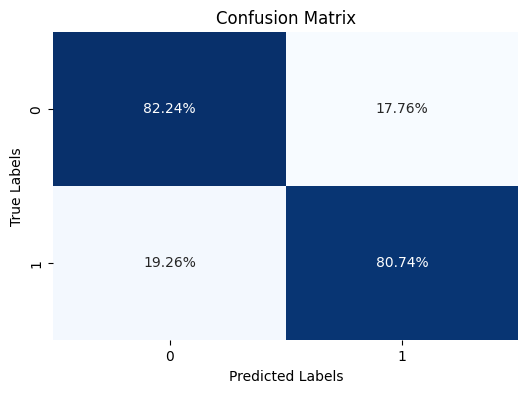

In [55]:
from sklearn.metrics import confusion_matrix

# Selected model
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Findings:
<br>Model XGBClassifier memiliki kemampuan dapat memprediksi kepuasan pelanggan dengan tepat sebesar 82.24% untuk kategori dissatisfied dan 80.74% untuk kategori satisfied.</br>

**Feature Importance**

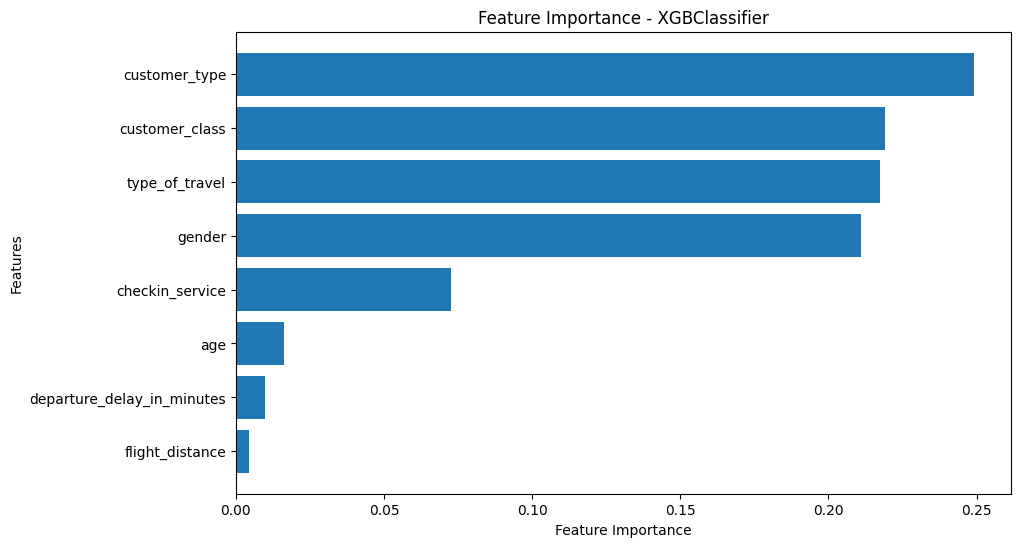

In [56]:
# Create selected model - XGBClassifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(X_train, y_train)

# Retrieve feature importance values
feature_importance = xgb.feature_importances_

# Retrieve feature names
features = X.columns

# Sort feature importance indices
sorted_idx = feature_importance.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - XGBClassifier')
plt.show()

Findings:
<br>Top 5 variabel yang paling penting atau memiliki kontribusi yang tinggi dalam model prediksi secara berurutan adalah Customer Type, Class, Type of Travel, Gender, dan Checkin service.</br>

# **CONCLUSION**



1. Model prediksi yang paling cocok untuk
kasus ini adalah model XGBClassifier.

2. Berdasarkan analisis menggunakan XGBClassifier pada model prediksi kepuasan penumpang maskapai, dapat disimpulkan bahwa variabel yang paling penting atau memiliki kontribusi yang tinggi dalam model secara berurutan adalah Customer Type, Class, Type of Travel, Gender, dan Checkin service. Hal ini menunjukkan bahwa faktor-faktor ini memiliki pengaruh yang signifikan terhadap prediksi kepuasan penumpang.

3. Saran strategi atau kebijakan yang dapat dilakukan:
  * Customer Type: Perhatikan perbedaan kepuasan antara pelanggan yang berbeda jenis, seperti pelanggan reguler atau pelanggan poin loyalitas. Hal ini dapat melibatkan upaya khusus dalam memberikan pengalaman yang memuaskan dan mengakomodasi kebutuhan berbagai jenis pelanggan.
  * Class: Tingkat kepuasan penumpang dapat bervariasi berdasarkan kelas penerbangan. Oleh karena itu, penting untuk memastikan kualitas layanan yang konsisten di setiap kelas penerbangan, serta memperhatikan kebutuhan dan harapan penumpang di setiap kelas.
  * Type of Travel: Perbedaan kepuasan dapat muncul antara penumpang yang melakukan perjalanan bisnis dan perjalanan rekreasi. Dalam mengembangkan strategi layanan, perlu memperhatikan kebutuhan dan preferensi khusus dari masing-masing tipe perjalanan ini.
  * Gender: Gender juga dapat mempengaruhi tingkat kepuasan penumpang. Oleh karena itu, perlu dilakukan analisis lebih lanjut untuk memahami faktor-faktor yang mungkin berkontribusi pada perbedaan kepuasan antara gender, sehingga langkah-langkah yang sesuai dapat diambil.
  * Checkin Service: Layanan check-in memiliki pengaruh yang signifikan terhadap kepuasan penumpang. Dalam hal ini, penting untuk memberikan perhatian khusus pada kualitas layanan check-in, mengurangi kemungkinan keterlambatan atau masalah lainnya, serta meningkatkan efisiensi dan pengalaman keseluruhan dalam proses check-in.



In [57]:
import joblib

In [58]:
joblib.dump(scaler, '../output/scaler.pkl')

['../output/scaler.pkl']

In [59]:
joblib.dump(xgb, '../output/xgbclassifier.pkl')

['../output/xgbclassifier.pkl']